In [1]:
import numpy as np
from PIL import Image

In [3]:
train_data = np.load('training_data.npy')

In [12]:
len(train_data)

2000

In [13]:
train_data.shape

(2000, 2)

In [19]:
for t in train_data[:1]:
        print (t[1])

[1, 0]


In [20]:
train_data = train_data[1:]

In [21]:
for t in train_data[:1]:
        print (t[1])

[0, 0]


In [22]:
len(train_data)

1999

In [52]:
img = np.array(train_data[1][0])

In [53]:
img.shape

(120, 160, 3)

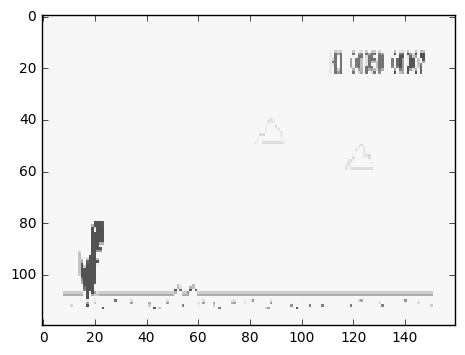

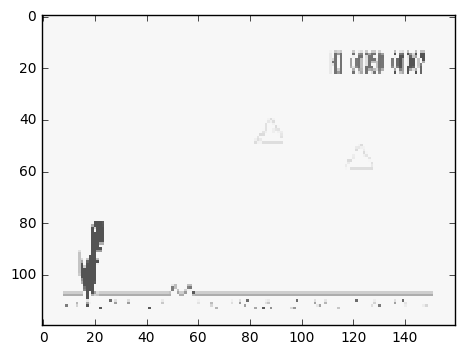

In [136]:
for t in train_data[:2]:
    #print (t[0])
    from matplotlib import pyplot as plt
    plt.imshow(t[0], interpolation='nearest')
    plt.show()
    

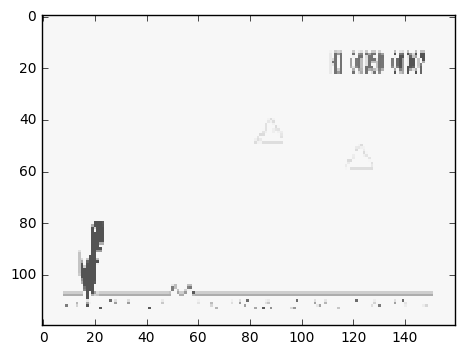

In [73]:
from matplotlib import pyplot as plt
plt.imshow(train_data[1][0], interpolation='nearest')
plt.show()

In [84]:
concat_train_data = np.concatenate((train_data,train_data))

In [85]:
concat_train_data.shape

(3998, 2)

In [86]:
concat_train_data2 = np.concatenate((concat_train_data,concat_train_data))

In [87]:
concat_train_data2.shape

(7996, 2)

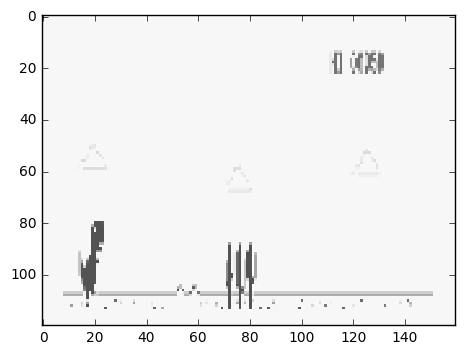

In [95]:
from matplotlib import pyplot as plt
plt.imshow(concat_train_data2[6300][0], interpolation='nearest')
plt.show()

In [96]:
np.save("final_training_data.npy",concat_train_data2)

In [97]:
final_train_data = np.load('final_training_data.npy')

In [105]:
len(final_train_data)

7996

In [106]:
final_train_data.shape

(7996, 2)

In [108]:
WIDTH = 160
HEIGHT = 120


train = final_train_data[:-100]
test = final_train_data[-100:]

X = np.array([i[0] for i in train]).reshape(-1,WIDTH,HEIGHT,1)
Y = [i[1] for i in train]

test_x = np.array([i[0] for i in test]).reshape(-1,WIDTH,HEIGHT,1)
test_y = [i[1] for i in test]

In [112]:
train.shape, test.shape

((7896, 2), (100, 2))

In [110]:
X.shape, len(Y)

((23688, 160, 120, 1), 7896)

In [111]:
test_x.shape, len(test_y)

((300, 160, 120, 1), 100)

In [131]:
train_set = {'input': X,'targets': Y} 
validation_set={'input': test_x , 'targets': test_y}

In [132]:
train_set['input'].shape, len(train_set['targets'])

((23688, 160, 120, 1), 7896)

In [133]:
validation_set['input'].shape, len(validation_set['targets'])

((300, 160, 120, 1), 100)

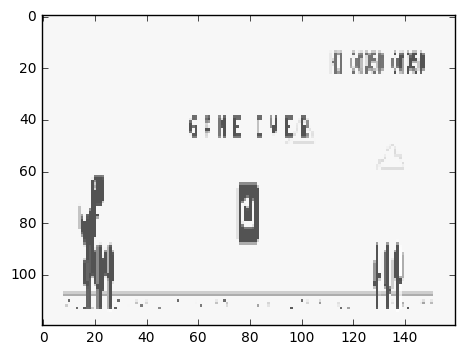

In [28]:
from matplotlib import pyplot as plt
plt.imshow(train_data2[18], interpolation='nearest')
plt.show()

In [100]:
X = final_train_data[:700]

In [103]:
Y = [i[0] for i in X]

In [104]:
Y

[array([[[247, 247, 247],
         [247, 247, 247],
         [247, 247, 247],
         ..., 
         [247, 247, 247],
         [247, 247, 247],
         [247, 247, 247]],
 
        [[247, 247, 247],
         [247, 247, 247],
         [247, 247, 247],
         ..., 
         [247, 247, 247],
         [247, 247, 247],
         [247, 247, 247]],
 
        [[247, 247, 247],
         [247, 247, 247],
         [247, 247, 247],
         ..., 
         [247, 247, 247],
         [247, 247, 247],
         [247, 247, 247]],
 
        ..., 
        [[247, 247, 247],
         [247, 247, 247],
         [247, 247, 247],
         ..., 
         [247, 247, 247],
         [247, 247, 247],
         [247, 247, 247]],
 
        [[247, 247, 247],
         [247, 247, 247],
         [247, 247, 247],
         ..., 
         [247, 247, 247],
         [247, 247, 247],
         [247, 247, 247]],
 
        [[247, 247, 247],
         [247, 247, 247],
         [247, 247, 247],
         ..., 
         [247, 247, 247

In [ ]:
# train_model.py

import numpy as np
from alexnet import alexnet
WIDTH = 160
HEIGHT = 120
LR = 1e-3
EPOCHS = 5
MODEL_NAME = 'pydinoai-{}-{}-{}-epochs-2k-data.model'.format(LR, 'alexnetv2',EPOCHS)

model = alexnet(WIDTH, HEIGHT, LR)

for i in range(EPOCHS):
    train_data = np.load('final_training_data.npy')

    train = train_data[:-750]
    test = train_data[-750:]

    X = np.array([i[0] for i in train]).reshape(-1,WIDTH,HEIGHT,1)
    Y = [i[1] for i in train]

    test_x = np.array([i[0] for i in test]).reshape(-1,WIDTH,HEIGHT,1)
    test_y = [i[1] for i in test]

    model.fit({'input': X}, {'targets': Y}, n_epoch=1, validation_set=({'input': test_x}, {'targets': test_y}), 
        snapshot_step=500, show_metric=True, run_id=MODEL_NAME)

    model.save(MODEL_NAME)


# tensorboard --logdir=foo:C:/path/to/log
